In [1]:
from io import StringIO
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import requests
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The code was removed by DSX for sharing.

/usr/local/src/conda3_runtime.v23/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,45,72,83,84,86,88,89,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NUMERODN,NUMERODV,PREFIXODN,CODCART,CODESTCART,CODMUNCART,NUMREGCART,DTREGCART,CODESTAB,COMUNESTAB,...,NUDOCRESP,ORGEMISSOR,CODCRM,CODPROPREE,DTDECLARAC,ESCMAEAGR1,ESCMAEAGR2,TPROBSON,STDNEPIDEM,STDNNOVA
0,19912113,NaN,NaN,0,41,410305,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,0
1,46831917,NaN,NaN,6232,41,410335,3869.0,8042009.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,0
2,41641521,NaN,NaN,0,41,411000,NaN,NaN,2733404.0,411000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,0
3,41608161,NaN,NaN,4588,41,411155,4670.0,7032008.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,0
4,6440834,NaN,NaN,12801,41,410165,3534.0,17072008.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0,0


In [3]:
#dn_columns = ['APGAR1','APGAR5','IDADEMAE','SEMAGESTAC','IDANOMAL','CEPNASC','CEPRES','QTDFILVIVO','QTDFILMORT','GRAVIDEZ']
#do_columns = ['PARTO','GESTACAO','TIPOBITO','OBITOPARTO','OBITOGRAV','IDADE']
#CODOCUPMAE
ids = ['DTNASC','CODMUNRES','PESO','PARTO'] #,'SEXO']
new = ['IDANOMAL']#'PESO','PARTO']
filterCols = ['APGAR1','APGAR5','SEXO','CONSULTAS','GESTACAO','IDADEMAE','ESTCIVMAE','ESCMAE','GRAVIDEZ','QTDFILVIVO','QTDFILMORT']
df1 = df_data_1[filterCols+ids+new]
df1.head()

,APGAR1,APGAR5,SEXO,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,DTNASC,CODMUNRES,PESO,PARTO,IDANOMAL
0,8.0,9.0,M,1.0,5.0,16,1.0,3.0,1.0,0.0,0.0,22052008,410305,3040.0,1.0,2.0
1,NaN,NaN,M,2.0,5.0,30,2.0,2.0,1.0,5.0,0.0,16022008,410335,2950.0,1.0,NaN
2,9.0,10.0,F,1.0,6.0,32,1.0,3.0,1.0,2.0,0.0,1032008,411000,3500.0,1.0,2.0
3,8.0,9.0,F,3.0,5.0,21,1.0,3.0,1.0,2.0,0.0,3032008,411155,2215.0,1.0,2.0
4,NaN,NaN,M,NaN,NaN,44,2.0,5.0,NaN,NaN,NaN,30062008,410165,NaN,1.0,NaN


# Obito

In [4]:
df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_4f57c93874b14e53b599bbcd482318a4('blueHackequipe7', 'DOPR2008_2016.csv'))

/usr/local/src/conda3_runtime.v23/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,9,22,29,43,83,84,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dfMortInf = df_data_2[pd.to_numeric(df_data_2['IDADE']) < 401].copy()
saidaMortalidadeInfantil = df_data_2[['CIRCOBITO','CODMUNRES','DTNASC','IDADE','TIPOBITO','SEXO','LOCOCOR','OCUPMAE','IDADEMAE','ESCMAE','PARTO','PESO','OBITOPARTO']]
saidaMortalidadeInfantil = saidaMortalidadeInfantil[pd.to_numeric(df_data_2['IDADE']) < 401].copy()
saidaMortalidadeInfantil = saidaMortalidadeInfantil[saidaMortalidadeInfantil['CIRCOBITO']!=1] 
saidaMortalidadeInfantil = saidaMortalidadeInfantil[saidaMortalidadeInfantil['CIRCOBITO']!=2] 
saidaMortalidadeInfantil = saidaMortalidadeInfantil[saidaMortalidadeInfantil['CIRCOBITO']!=3] 
saidaMortalidadeInfantil = saidaMortalidadeInfantil[saidaMortalidadeInfantil['CIRCOBITO']!=4] 
saidaMortalidadeInfantil = saidaMortalidadeInfantil[saidaMortalidadeInfantil['CIRCOBITO']!=9]
del saidaMortalidadeInfantil['TIPOBITO']
del saidaMortalidadeInfantil['CIRCOBITO']
del saidaMortalidadeInfantil['LOCOCOR']
del saidaMortalidadeInfantil['OCUPMAE']
del saidaMortalidadeInfantil['ESCMAE']
del saidaMortalidadeInfantil['OBITOPARTO']
del saidaMortalidadeInfantil['IDADE']
del saidaMortalidadeInfantil['IDADEMAE']
saidaMortalidadeInfantil['OBITO'] = 1
saidaMortalidadeInfantil.head()

,CODMUNRES,DTNASC,SEXO,PARTO,PESO,OBITO
3,410690,14032008.0,F,1.0,725.0,1
145,412788,16052008.0,M,NaN,NaN,1
258,411065,24062007.0,M,2.0,2700.0,1
294,412033,12022008.0,M,2.0,4190.0,1
307,410753,21012008.0,M,1.0,815.0,1


In [6]:
ids = ['DTNASC','CODMUNRES','PESO','PARTO','SEXO']
saidaMortalidadeInfantil['id'] = saidaMortalidadeInfantil.DTNASC.astype(str) + '_' +saidaMortalidadeInfantil.CODMUNRES.astype(str) + '_' + saidaMortalidadeInfantil.PESO.astype(str) + '_' + saidaMortalidadeInfantil.PARTO.astype(str) + '_' + saidaMortalidadeInfantil.SEXO.astype(str)
df = df1.merge(saidaMortalidadeInfantil, on=ids,how='left')
tmp = df[df['id'].isnull()]
tmp.head()

,APGAR1,APGAR5,SEXO,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,DTNASC,CODMUNRES,PESO,PARTO,IDANOMAL,OBITO,id
0,8.0,9.0,M,1.0,5.0,16,1.0,3.0,1.0,0.0,0.0,22052008,410305,3040.0,1.0,2.0,NaN,NaN
1,NaN,NaN,M,2.0,5.0,30,2.0,2.0,1.0,5.0,0.0,16022008,410335,2950.0,1.0,NaN,NaN,NaN
2,9.0,10.0,F,1.0,6.0,32,1.0,3.0,1.0,2.0,0.0,1032008,411000,3500.0,1.0,2.0,NaN,NaN
3,8.0,9.0,F,3.0,5.0,21,1.0,3.0,1.0,2.0,0.0,3032008,411155,2215.0,1.0,2.0,NaN,NaN
4,NaN,NaN,M,NaN,NaN,44,2.0,5.0,NaN,NaN,NaN,30062008,410165,NaN,1.0,NaN,NaN,NaN


In [7]:
df = df.drop_duplicates('id',keep=False)
df = pd.DataFrame.append(df,tmp)
del df['DTNASC']
del df['CODMUNRES']
#del df['PESO']
#del df['PARTO']
del df['id']
df['OBITO']=df['OBITO'].fillna(0)
df.head()

,APGAR1,APGAR5,SEXO,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,PESO,PARTO,IDANOMAL,OBITO
10,1.0,1.0,M,1.0,2.0,22,5.0,4.0,1.0,2.0,1.0,480.0,1.0,2.0,1.0
31,NaN,NaN,M,3.0,3.0,17,2.0,2.0,1.0,2.0,0.0,NaN,1.0,2.0,1.0
32,5.0,NaN,M,1.0,3.0,27,2.0,2.0,1.0,1.0,NaN,1520.0,1.0,2.0,1.0
250,7.0,9.0,F,1.0,5.0,29,1.0,2.0,1.0,3.0,0.0,4050.0,1.0,2.0,1.0
443,3.0,6.0,F,2.0,3.0,17,1.0,3.0,1.0,0.0,0.0,770.0,1.0,2.0,1.0


# Filtros

In [8]:
print(len(df[df["OBITO"]==1]))
print(len(df))
df = df[df["APGAR1"]<=10]
df = df[df["APGAR5"]<=10]
df = df[df["IDADEMAE"]<90]
df = df[df['QTDFILMORT']<=10]
df = df[df['QTDFILVIVO']<=20]
df = df[df['GRAVIDEZ']!=9]
df = df[df['CONSULTAS']!=9]
df = df[df['ESCMAE']!=9]
df = df[df['IDANOMAL']!=9]
df = df[df['SEXO']!=2]
print(len(df))

12208
1400615
1374925


In [9]:
#remove nan
print(len(df))
df = df.dropna(subset= ['CONSULTAS'])
df = df.dropna(subset = ['APGAR1','APGAR5'])
df = df.dropna(subset = ['GESTACAO'])
df = df.dropna(subset = ['ESTCIVMAE'])
df = df.dropna(subset = ['ESCMAE'])
df = df.dropna(subset = ['GRAVIDEZ'])
df = df.dropna(subset = ['IDANOMAL'])
df = df.dropna(subset = ['PARTO'])
df = df.dropna(subset = ['PESO'])
print(len(df))
print(len(df[df["OBITO"]==1]))

1374925
1356438
11490


In [10]:
#sexo
df = df.sample(frac=1).reset_index(drop=True)
sexo = df["SEXO"]

sex_encoded, sex_categories = sexo.factorize()
sex_df = pd.DataFrame(sex_encoded, columns=["MENINA"])
df = pd.concat([df, sex_df], axis=1)
del df['SEXO']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356438 entries, 0 to 1356437
Data columns (total 15 columns):
APGAR1        1356438 non-null float64
APGAR5        1356438 non-null float64
CONSULTAS     1356438 non-null float64
GESTACAO      1356438 non-null float64
IDADEMAE      1356438 non-null int64
ESTCIVMAE     1356438 non-null float64
ESCMAE        1356438 non-null float64
GRAVIDEZ      1356438 non-null float64
QTDFILVIVO    1356438 non-null float64
QTDFILMORT    1356438 non-null float64
PESO          1356438 non-null float64
PARTO         1356438 non-null float64
IDANOMAL      1356438 non-null float64
OBITO         1356438 non-null float64
MENINA        1356438 non-null int64
dtypes: float64(13), int64(2)
memory usage: 155.2 MB


# Analise

In [11]:
risco = df[df['APGAR5']<7]
s_risco = df[df['APGAR5']>=7]

In [12]:
df.describe()

,APGAR1,APGAR5,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,PESO,PARTO,IDANOMAL,OBITO,MENINA
count,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06,1.356438e+06
mean,8.382618e+00,9.508325e+00,3.762333e+00,4.906325e+00,2.619051e+01,2.011638e+00,3.932977e+00,1.022266e+00,8.928738e-01,1.494996e-01,3.167449e+03,1.606076e+00,1.992810e+00,8.470715e-03,4.883224e-01
std,1.264420e+00,8.602523e-01,5.302770e-01,4.068812e-01,6.579403e+00,1.369141e+00,7.590069e-01,1.522869e-01,1.151975e+00,4.566982e-01,5.372909e+02,4.886184e-01,8.448942e-02,9.164589e-02,5.000009e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,9.000000e+00,4.000000e+00,5.000000e+00,2.100000e+01,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.900000e+03,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,1.000000e+01,4.000000e+00,5.000000e+00,2.600000e+01,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.200000e+03,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,1.000000e+01,4.000000e+00,5.000000e+00,3.100000e+01,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.500000e+03,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+01,1.000000e+01,4.000000e+00,9.000000e+00,6.300000e+01,9.000000e+00,5.000000e+00,3.000000e+00,1.800000e+01,1.000000e+01,6.565000e+03,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00


In [13]:
risco.describe()

,APGAR1,APGAR5,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,PESO,PARTO,IDANOMAL,OBITO,MENINA
count,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000
mean,3.060279,4.276039,3.396460,4.017496,25.710498,1.907736,3.796200,1.083994,0.873770,0.195325,2286.277269,1.500752,1.909923,0.298387,0.446214
std,2.371816,1.945995,0.812685,1.240025,7.099706,1.360200,0.772992,0.293898,1.255426,0.543744,1110.010413,0.500017,0.286301,0.457566,0.504350
min,0.000000,0.000000,1.000000,1.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,127.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,3.000000,20.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1225.000000,1.000000,2.000000,0.000000,0.000000
50%,2.000000,5.000000,4.000000,5.000000,25.000000,1.000000,4.000000,1.000000,0.000000,0.000000,2515.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,6.000000,4.000000,5.000000,31.000000,2.000000,4.000000,1.000000,1.000000,0.000000,3200.000000,2.000000,2.000000,1.000000,1.000000
max,10.000000,6.000000,4.000000,9.000000,52.000000,9.000000,5.000000,3.000000,11.000000,10.000000,5880.000000,2.000000,2.000000,1.000000,2.000000


In [14]:
s_risco.describe()

,APGAR1,APGAR5,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,PESO,PARTO,IDANOMAL,OBITO,MENINA
count,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06,1.341806e+06
mean,8.440656e+00,9.565381e+00,3.766322e+00,4.916018e+00,2.619574e+01,2.012771e+00,3.934468e+00,1.021593e+00,8.930822e-01,1.489999e-01,3.177058e+03,1.607225e+00,1.993714e+00,5.309262e-03,4.887815e-01
std,1.114712e+00,6.364117e-01,5.249598e-01,3.766725e-01,6.573312e+00,1.369195e+00,7.587173e-01,1.498677e-01,1.150794e+00,4.556321e-01,5.194565e+02,4.883677e-01,7.903664e-02,7.267103e-02,4.999339e-01
min,0.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,9.000000e+00,4.000000e+00,5.000000e+00,2.100000e+01,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.900000e+03,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,1.000000e+01,4.000000e+00,5.000000e+00,2.600000e+01,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.200000e+03,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,9.000000e+00,1.000000e+01,4.000000e+00,5.000000e+00,3.100000e+01,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.500000e+03,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+01,1.000000e+01,4.000000e+00,9.000000e+00,6.300000e+01,9.000000e+00,5.000000e+00,3.000000e+00,1.800000e+01,1.000000e+01,6.565000e+03,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00


In [15]:
corr_matrix = df.corr()
corr_matrix["OBITO"].sort_values(ascending=False)

OBITO         1.000000
GRAVIDEZ      0.054839
QTDFILMORT    0.014483
QTDFILVIVO    0.001584
IDADEMAE     -0.003971
ESTCIVMAE    -0.005427
MENINA       -0.007205
PARTO        -0.008426
ESCMAE       -0.014275
CONSULTAS    -0.089005
IDANOMAL     -0.182174
PESO         -0.234428
APGAR1       -0.249012
GESTACAO     -0.303077
APGAR5       -0.305506
Name: OBITO, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a83c80b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9a6f7aa940>]], dtype=object)

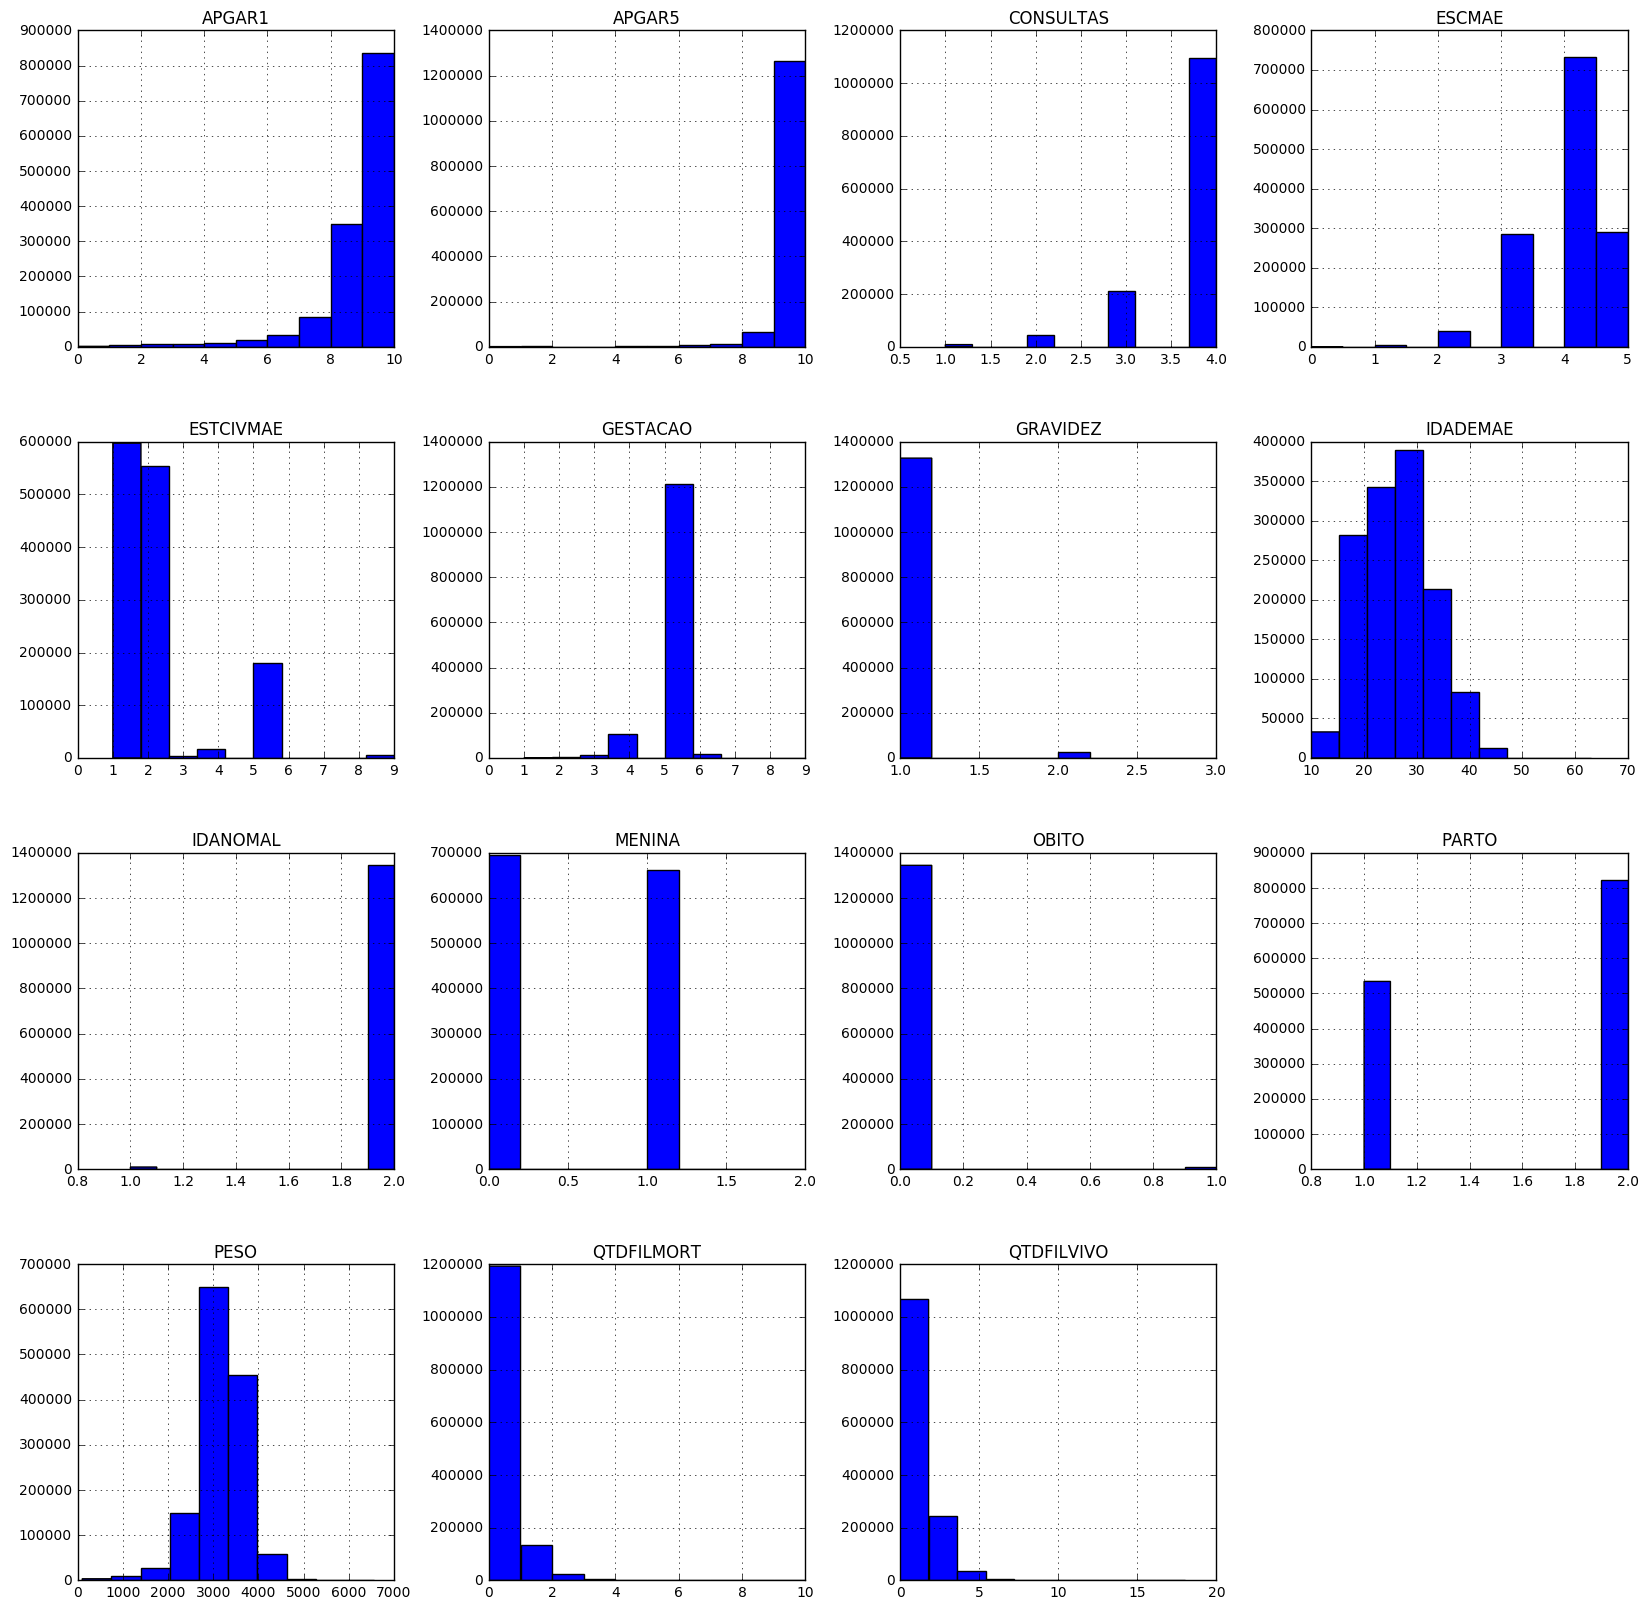

In [16]:
df.hist(figsize=(20,20))

In [17]:
df.head()

,APGAR1,APGAR5,CONSULTAS,GESTACAO,IDADEMAE,ESTCIVMAE,ESCMAE,GRAVIDEZ,QTDFILVIVO,QTDFILMORT,PESO,PARTO,IDANOMAL,OBITO,MENINA
0,8.0,9.0,4.0,5.0,25,2.0,4.0,1.0,2.0,0.0,2965.0,2.0,2.0,0.0,0
1,9.0,10.0,4.0,5.0,40,2.0,2.0,2.0,4.0,1.0,2380.0,2.0,2.0,0.0,1
2,9.0,10.0,4.0,5.0,20,2.0,4.0,1.0,0.0,0.0,3095.0,2.0,2.0,0.0,0
3,9.0,10.0,4.0,6.0,18,5.0,3.0,1.0,1.0,0.0,3815.0,1.0,2.0,0.0,0
4,9.0,10.0,3.0,5.0,18,1.0,3.0,1.0,1.0,0.0,3570.0,1.0,2.0,0.0,0


In [18]:
encoded, categories = df['ESTCIVMAE'].factorize()
del df['ESTCIVMAE']
encoder = OneHotEncoder()
estciv_num = encoder.fit_transform(encoded.reshape(-1,1)).toarray()
estciv_num = pd.DataFrame(estciv_num, columns=["SEPARADA","SOLTEIRA","CASADA","ESTAVEL","IGNORADA","VIUVA"])
df = pd.concat([df, estciv_num], axis=1)
del df["IGNORADA"]

In [19]:
encoded, categories = df['GRAVIDEZ'].factorize()
del df['GRAVIDEZ']
encoder = OneHotEncoder()
estciv_num = encoder.fit_transform(encoded.reshape(-1,1)).toarray()
estciv_num = pd.DataFrame(estciv_num, columns=["GRAV_UNICA","GRAV_DUPLA","GRAV_MULT"])
df = pd.concat([df, estciv_num], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356438 entries, 0 to 1356437
Data columns (total 21 columns):
APGAR1        1356438 non-null float64
APGAR5        1356438 non-null float64
CONSULTAS     1356438 non-null float64
GESTACAO      1356438 non-null float64
IDADEMAE      1356438 non-null int64
ESCMAE        1356438 non-null float64
QTDFILVIVO    1356438 non-null float64
QTDFILMORT    1356438 non-null float64
PESO          1356438 non-null float64
PARTO         1356438 non-null float64
IDANOMAL      1356438 non-null float64
OBITO         1356438 non-null float64
MENINA        1356438 non-null int64
SEPARADA      1356438 non-null float64
SOLTEIRA      1356438 non-null float64
CASADA        1356438 non-null float64
ESTAVEL       1356438 non-null float64
VIUVA         1356438 non-null float64
GRAV_UNICA    1356438 non-null float64
GRAV_DUPLA    1356438 non-null float64
GRAV_MULT     1356438 non-null float64
dtypes: float64(19), int64(2)
memory usage: 217.3 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a6f6d4128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9a6dd092b0>]], dtype=object)

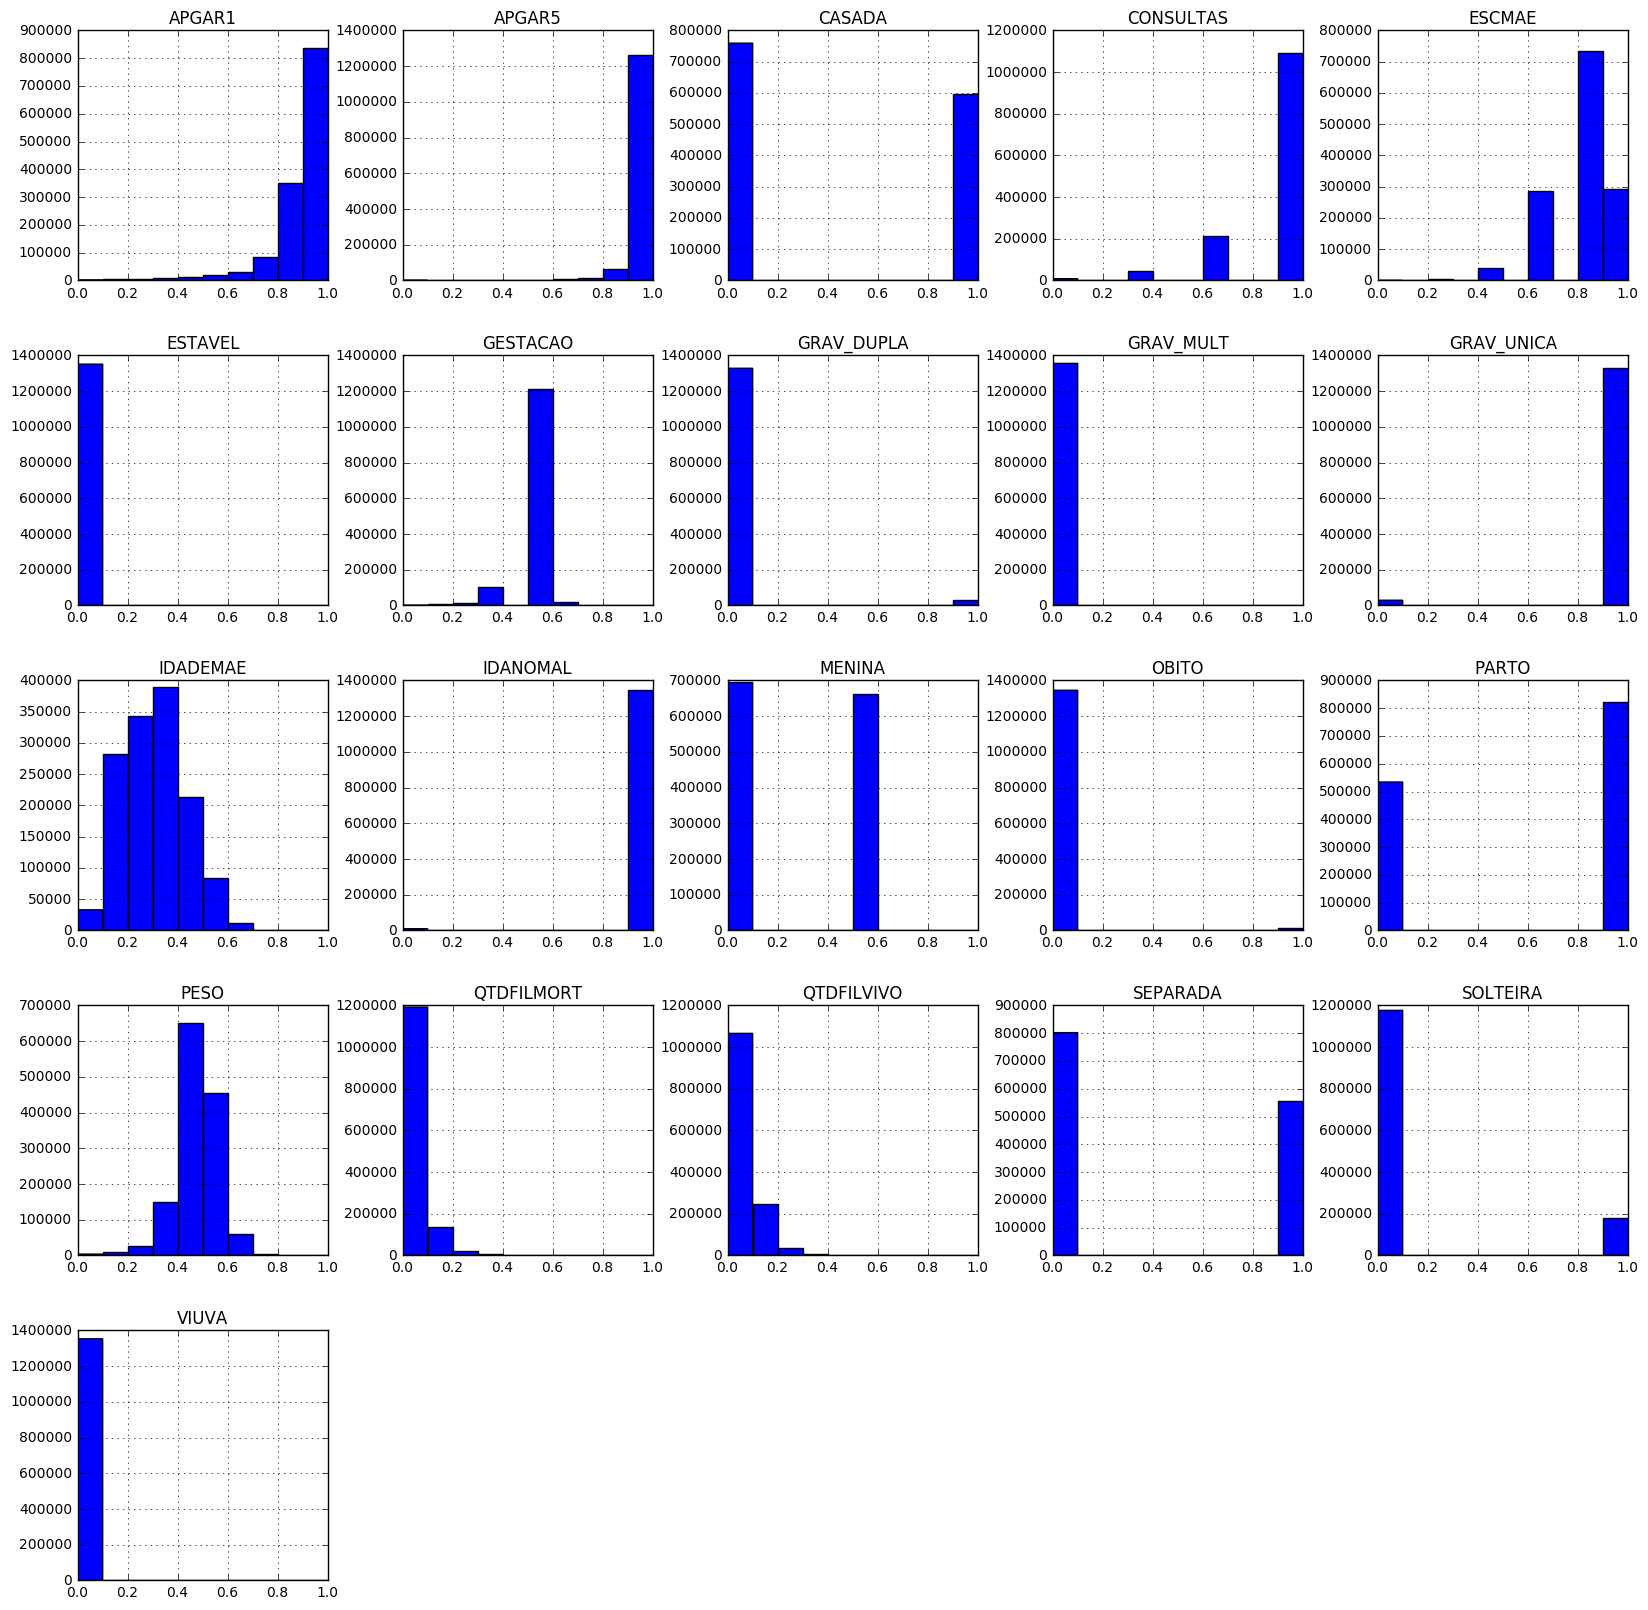

In [21]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.hist(figsize=(20,20))

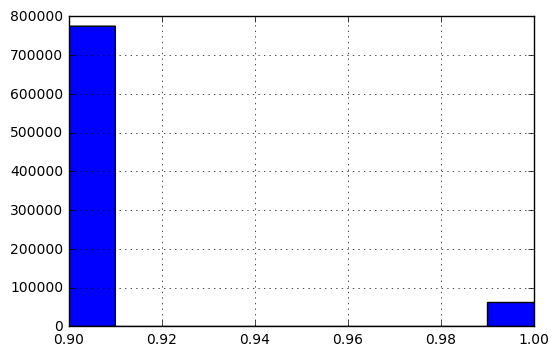

In [22]:
#df.hist(figsize=(20,20),bins=11)
asd = df[df['APGAR1']>=0.9]
asd['APGAR1'].hist()

# Treino

In [130]:
from sklearn.metrics import confusion_matrix


def pred(pre, df_test_y):
    pre_b = [int(p>0.5) for p in pre]
    mat = confusion_matrix(df_test_y,pre_b)
    print(mat[1][1]/(mat[1][1]+mat[0][1]))
    print(mat[1][1]/(mat[1][1]+mat[1][0]))
    print (mat)
    print(mat[1][1]+mat[0][1], 'Risco:', mat[1][1], 'obitos', mat[1][1]*100/(mat[1][1]+mat[0][1]),"%" )
    print(mat[0][0]+mat[1][0], 'Nao Risco:', mat[1][0], 'obitos', (mat[1][0]*100)/(mat[0][0]+mat[1][0]),"%")
    

In [24]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
cols = ['CONSULTAS', 'GESTACAO', 'IDADEMAE', 'ESCMAE',\
       'QTDFILVIVO', 'QTDFILMORT', 'OBITO',\
       'MENINA', 'SEPARADA', 'SOLTEIRA', 'CASADA', 'ESTAVEL', 'VIUVA',\
       'GRAV_UNICA', 'GRAV_DUPLA', 'GRAV_MULT']#, 'PARTO' <-talvez usar
df_train,df_test= split_train_test(df,0.2)
df_train = df_train[cols]
df_test = df_test[cols]
df_train_y = df_train['OBITO'].to_frame()
df_train_x = df_train.drop(['OBITO'],axis=1)
df_test_y = df_test['OBITO'].to_frame()
df_test_x = df_test.drop(['OBITO'],axis=1)

df_train_y.head()

,OBITO
411384,0.0
1210057,0.0
1040755,0.0
962784,0.0
369433,0.0


## Linear

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(df_train_x,df_train_y)
pre = lin_reg.predict(df_train_x)
lin_mse = mean_squared_error(df_train_y,pre)
np.sqrt(lin_mse)

0.087300947200852741

## Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_x,df_train_y)
pre = tree_reg.predict(df_train_x)
tree_mse = mean_squared_error(df_train_y, pre)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.069802306134313735

In [27]:
pre

array([ 0.00235018,  0.        ,  0.00183486, ...,  0.00267237,
        0.00413223,  0.00326797])

In [28]:
pre = tree_reg.predict(df_test_x)
tree_mse = mean_squared_error(df_test_y, pre)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.094426126835103791

In [29]:
pred(pre,df_test_y)

0.409770687936
0.180977542933
[[268424    592]
 [  1860    411]]
1003 Risco: 411 obitos 40.9770687936 %
270284 Nao Risco: 1860 obitos 0.688165041216 %


In [164]:
df_final = pd.DataFrame([441,"41%","270284","0.7%"],columns = ['Decision Tree Regressor'], index = ['Classificados para o grupo de Risco','Obitos classificados corretamente no grupo de Risco (%)','Classificados para o grupo de Baixo Risco','Obitos classificados incorretamente no grupo de Baixo Risco (%)'])

## Perceptron

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(df_train_x, df_train_y)

pre=sgd_clf.predict(df_test_x)

pred(pre,df_test_y)


/gpfs/fs01/user/s65d-dfd75d73ee7d97-fff82f9b9377/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/gpfs/fs01/user/s65d-dfd75d73ee7d97-fff82f9b9377/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nan
0.0
[[269016      0]
 [  2271      0]]
0 Risco: 0 obitos nan %
271287 Nao Risco: 2271 obitos 0.83712083513 %


## Decision Tree Classifier

In [152]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(df_train_x, df_train_y)
pre = tree_clf.predict(df_test_x)

In [165]:
df_final['Decision Tree Classifier'] = ["553","55%","270321","0.6%"]
pred(pre, df_test_y)

0.551759834369
0.234698370762
[[268583    433]
 [  1738    533]]
966 Risco: 533 obitos 55.1759834369 %
270321 Nao Risco: 1738 obitos 0.64293932029 %


## Random Forest Classifier

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest_clf = RandomForestClassifier(random_state=42)

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(df_train_x, df_train_y)

grid_search.best_estimator_

/gpfs/fs01/user/s65d-dfd75d73ee7d97-fff82f9b9377/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/gpfs/fs01/user/s65d-dfd75d73ee7d97-fff82f9b9377/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/gpfs/fs01/user/s65d-dfd75d73ee7d97-fff82f9b9377/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/gpfs/f

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [117]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [118]:

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [121]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.036096  ,  0.40350795,  0.27618008,  0.06444092,  0.08530128,
        0.04225164,  0.03762161,  0.01469173,  0.01248085,  0.01440612,
        0.00178304,  0.00162191,  0.00446714,  0.00377483,  0.0013749 ])

In [123]:
ols = ['CONSULTAS', 'GESTACAO', 'IDADEMAE', 'ESCMAE',\
       'QTDFILVIVO', 'QTDFILMORT',\
       'MENINA', 'SEPARADA', 'SOLTEIRA', 'CASADA', 'ESTAVEL', 'VIUVA',\
       'GRAV_UNICA', 'GRAV_DUPLA', 'GRAV_MULT']

sorted(zip(feature_importances, cols), reverse=True)

[(0.40350795380409016, 'GESTACAO'),
 (0.27618008342386496, 'IDADEMAE'),
 (0.085301280810358385, 'QTDFILVIVO'),
 (0.064440917480875368, 'ESCMAE'),
 (0.042251644979381428, 'QTDFILMORT'),
 (0.037621607629815264, 'OBITO'),
 (0.036095995917173891, 'CONSULTAS'),
 (0.014691728092586979, 'MENINA'),
 (0.014406119616203021, 'SOLTEIRA'),
 (0.012480853795391857, 'SEPARADA'),
 (0.0044671381222174027, 'VIUVA'),
 (0.0037748324504493888, 'GRAV_UNICA'),
 (0.0017830408517441468, 'CASADA'),
 (0.0016219069100975785, 'ESTAVEL'),
 (0.0013748961157501428, 'GRAV_DUPLA')]

In [125]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.0905271931839 {'max_features': 2, 'n_estimators': 3}
0.0881738327016 {'max_features': 2, 'n_estimators': 10}
0.0875310033173 {'max_features': 2, 'n_estimators': 30}
0.0907299650764 {'max_features': 4, 'n_estimators': 3}
0.0882110445236 {'max_features': 4, 'n_estimators': 10}
0.0874970636267 {'max_features': 4, 'n_estimators': 30}
0.0907324055581 {'max_features': 6, 'n_estimators': 3}
0.0881414767576 {'max_features': 6, 'n_estimators': 10}
0.0874800538298 {'max_features': 6, 'n_estimators': 30}
0.09059872688 {'max_features': 8, 'n_estimators': 3}
0.0881947515915 {'max_features': 8, 'n_estimators': 10}
0.0875306727431 {'max_features': 8, 'n_estimators': 30}
0.0919938238742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.090802446562 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.0918522753421 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.0907562580046 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.0920790987229 {'bootstrap': Fal

In [131]:
forest_reg = RandomForestRegressor(max_features= 6, n_estimators=30)
forest_reg.fit(df_train_x, df_train_y)


/usr/local/src/conda3_runtime.v23/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [132]:
pre = forest_reg.predict(df_test_x)
pred(pre, df_test_y)

0.47027027027
0.191545574637
[[268526    490]
 [  1836    435]]
925 Risco: 435 obitos 47.027027027 %
270362 Nao Risco: 1836 obitos 0.679089517018 %


In [166]:
df_final['Random Forest Classifier'] = ["433","47%","270362","0.7%"]
df_final.head()

,Decision Tree Regressor,Decision Tree Classifier,Random Forest Classifier
Classificados para o grupo de Risco,441,553,433
Obitos classificados corretamente no grupo de Risco (%),41%,55%,47%
Classificados para o grupo de Baixo Risco,270284,270321,270362
Obitos classificados incorretamente no grupo de Baixo Risco (%),0.7%,0.6%,0.7%


## PCA

In [84]:
from sklearn.decomposition import PCA
pca_skl = PCA(n_components=10)
pca_skl.fit(pd.concat([df_train_x,df_test_x]))

df_train_pca_x = pca_skl.transform(df_train_x)
df_test_pca_x = pca_skl.transform(df_test_x)
df_test_pca_y

array([[-0.07947686,  0.27914232, -0.246939  , ...,  0.47857202,
         0.18354592, -0.38955328],
       [-0.07947686,  0.27914232, -0.246939  , ...,  0.47857202,
         0.18354592, -0.38955328],
       [-0.07947686,  0.27914232, -0.246939  , ...,  0.47857202,
         0.18354592, -0.38955328],
       ..., 
       [-0.07947686,  0.27914232, -0.246939  , ...,  0.47857202,
         0.18354592, -0.38955328],
       [-0.07947686,  0.27914232, -0.246939  , ...,  0.47857202,
         0.18354592, -0.38955328],
       [-0.07947686,  0.27914232, -0.246939  , ...,  0.47857202,
         0.18354592, -0.38955328]])

In [104]:
df_train_x_red = df_train_x.head(50000)
df_train_y_red = df_train_y.head(50000)
df_train_y_red.sum()

OBITO    427.0
dtype: float64

## Neural Network

In [108]:
%%time
from 
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-4,
                     hidden_layer_sizes=(15,100,1), max_iter=200,epsilon=1e-09,activation='tanh')

#clf.fit(df_train_x, df_train_y)                         
clf.fit(df_train_x_red, df_train_y_red) 

pre = clf.predict(df_test_x)

/gpfs/fs01/user/s65d-dfd75d73ee7d97-fff82f9b9377/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5min 35s, sys: 21.1 s, total: 5min 56s
Wall time: 15.5 s


In [109]:
pre.max()

1.0

In [110]:
pred(pre,df_test_y)

0.530537830447
0.256274768824
[[268501    515]
 [  1689    582]]
1097 Risco: 582 obitos 53.0537830447 %
270190 Nao Risco: 1689 obitos 0.625115659351 %


In [167]:
df_final['Neural Network'] = ["582","53%","270190","0.6%"]

# Resultados

In [168]:
df_final

,Decision Tree Regressor,Decision Tree Classifier,Random Forest Classifier,Neural Network
Classificados para o grupo de Risco,441,553,433,582
Obitos classificados corretamente no grupo de Risco (%),41%,55%,47%,53%
Classificados para o grupo de Baixo Risco,270284,270321,270362,270190
Obitos classificados incorretamente no grupo de Baixo Risco (%),0.7%,0.6%,0.7%,0.6%
